In [98]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_400m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_400m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='any_crime_400m'

In [99]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [100]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                       Any Crime Incidents Within 90m, Dec. 2022   
                                                 \emph{Independent Variable}                                                       
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_90m                                    7.938281e-116   
                                                 pre_treatment_change_in_any_crime_90m                              3.355067e-02   
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                 2.854454e-05   
                                                 job_density_2013                                                   2.699736e-35   
                                                 med_hhinc2016                                                      4.042995e-03   
                                                 poor_share2010                                                     6.705208e-01   
                                                 popdensity2010                                                     5.377472e-05   
                                                 rent_twobed2015                                                    4.595405e-22   
                                                 share_white2010                                                    2.348003e-02   
                                                 traveltime15_2010                                                  6.853663e-12   
Panel C: Case Initiation                         for_cause                                                          4.663330e-02   
                                                 no_cause                                                           8.106038e-02   
                                                 non_payment                                                        3.179072e-03   
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                           7.792163e-02   
                                                 hasAttyP                                                           5.573832e-04   
                                                 isEntityD                                                          3.204388e-01   
                                                 isEntityP                                                          1.259430e-07   

                                                                                                          
                                                                                       Plaintiff Victory  
                                                 \emph{Independent Variable}                              
Panel A: Pre-treatment Outcomes                  twenty_seventeen_any_crime_90m             8.887075e-02  
                                                 pre_treatment_change_in_any_crime_90m      6.083577e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                         2.403331e-01  
                                                 job_density_2013                           1.626836e-01  
                                                 med_hhinc2016                              1.910501e-01  
                                                 poor_share2010                             1.428679e-01  
                                                 popdensity2010                             5.946111e-02  
                                                 rent_twobed2015                            5.003043e-01  
                                                 share_white2010                            9.829904e-02  
                                                 traveltime15_2010                          2.271578e-01  
Panel C: Case Initiation                         for_cause                    

In [101]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                Cases Won by Plaintiff   
Panel A twenty_seventeen_any_crime_90m                        4.274921   
        pre_treatment_change_in_any_crime_90m                -0.381952   
Panel B Share with bachelor's degree                          0.322882   
        Jobs per square mile (2010)                       16069.137185   
        Median household income (2016)                    48035.651626   
        Population density (2010)                         23086.043553   
        Median two bedroom rent (2015)                     1339.985876   
        Share white (2010)                                    0.312272   
        Share with commute $<$15 minutes (2010)               0.162315   
Panel C For cause                                             0.165268   
        Non-payment of rent                                   0.781742   
Panel D Plaintiff has an attorney                             0.879853   
        Plaintiff is an entity                                0.808499   

                                                Difference in Cases Won by Defendant  \
                                                                          Unweighted   
Panel A twenty_seventeen_any_crime_90m                                      0.444824   
        pre_treatment_change_in_any_crime_90m                              -0.100398   
Panel B Share with bachelor's degree                                        0.014179   
        Jobs per square mile (2010)                                      3197.929971   
        Median household income (2016)                                   1777.651626   
        Population density (2010)                                        1373.148087   
        Median two bedroom rent (2015)                                    -29.551242   
        Share white (2010)                                                  0.024618   
        Share with commute $<$15 minutes (2010)                             0.005986   
Panel C For cause                                                          -0.014344   
        Non-payment of rent                                                 0.068150   
Panel D Plaintiff has an attorney                                           0.071601   
        Plaintiff is an entity                                              0.099762   

                                                                         \
                                                 \emph{p}      Weighted   
Panel A twenty_seventeen_any_crime_90m           0.088871      0.644084   
        pre_treatment_change_in_any_crime_90m    0.608358     -0.092307   
Panel B Share with bachelor's degree             0.240333      0.072599   
        Jobs per square mile (2010)              0.162684  12507.898978   
        Median household income (2016)           0.191050   3395.821344   
        Population density (2010)                0.059461    473.977486   
        Median two bedroom rent (2015)           0.500304    176.714072   
        Share white (2010)                       0.098299      0.088494   
        Share with commute $<$15 minutes (2010)  0.227158      0.023042   
Panel C For cause                                0.480104     -0.033224   
        Non-payment of rent                      0.002881      0.160332   
Panel D Plaintiff has an attorney                0.000102      0.205701   
        Plaintiff is an entity                   0.000006      0.231186   

                                                               
                                                     \emph{p}  
Panel A twenty_seventeen_any_crime_90m           2.033948e-01  
        pre_treatment_change_in_any_crime_90m    8.007413e-01  
Panel B Share with bachelor's degree             9.762314e-04  
        Jobs per square mile (2010)              3.938829e-03  
        Median household income (2016)           1.873434e-01  
        Population density (2010)                7.368437e-01  
  

In [102]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, value_vars_crime, month_to_int_dictionary)

In [103]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:13<00:00, 164.05it/s]


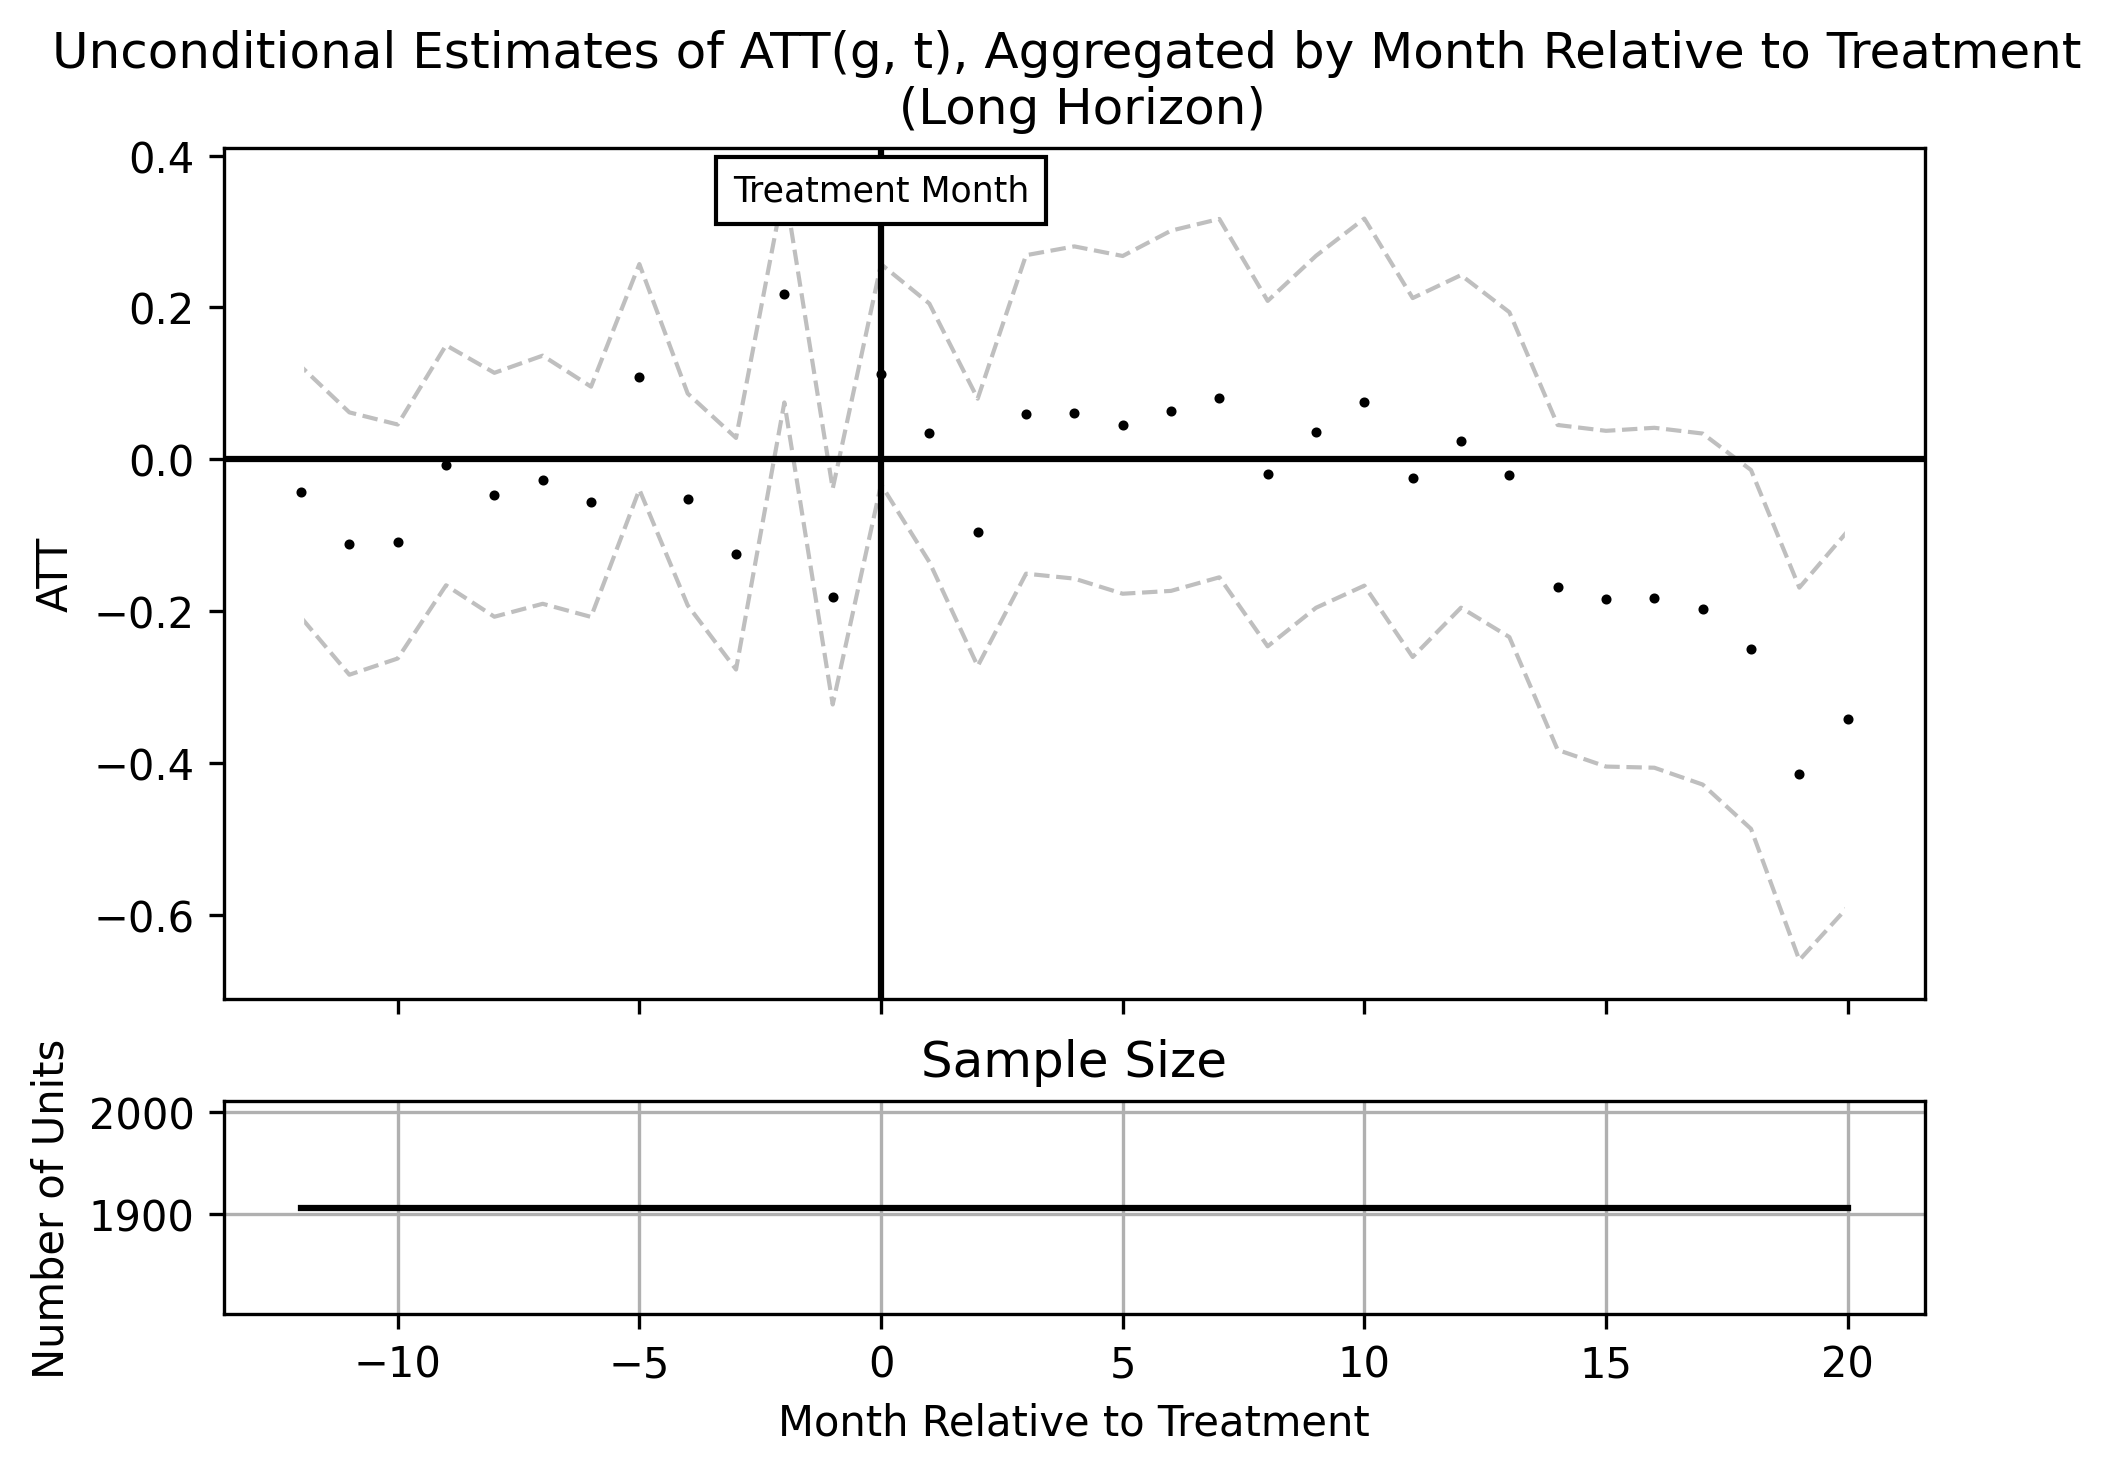

In [104]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

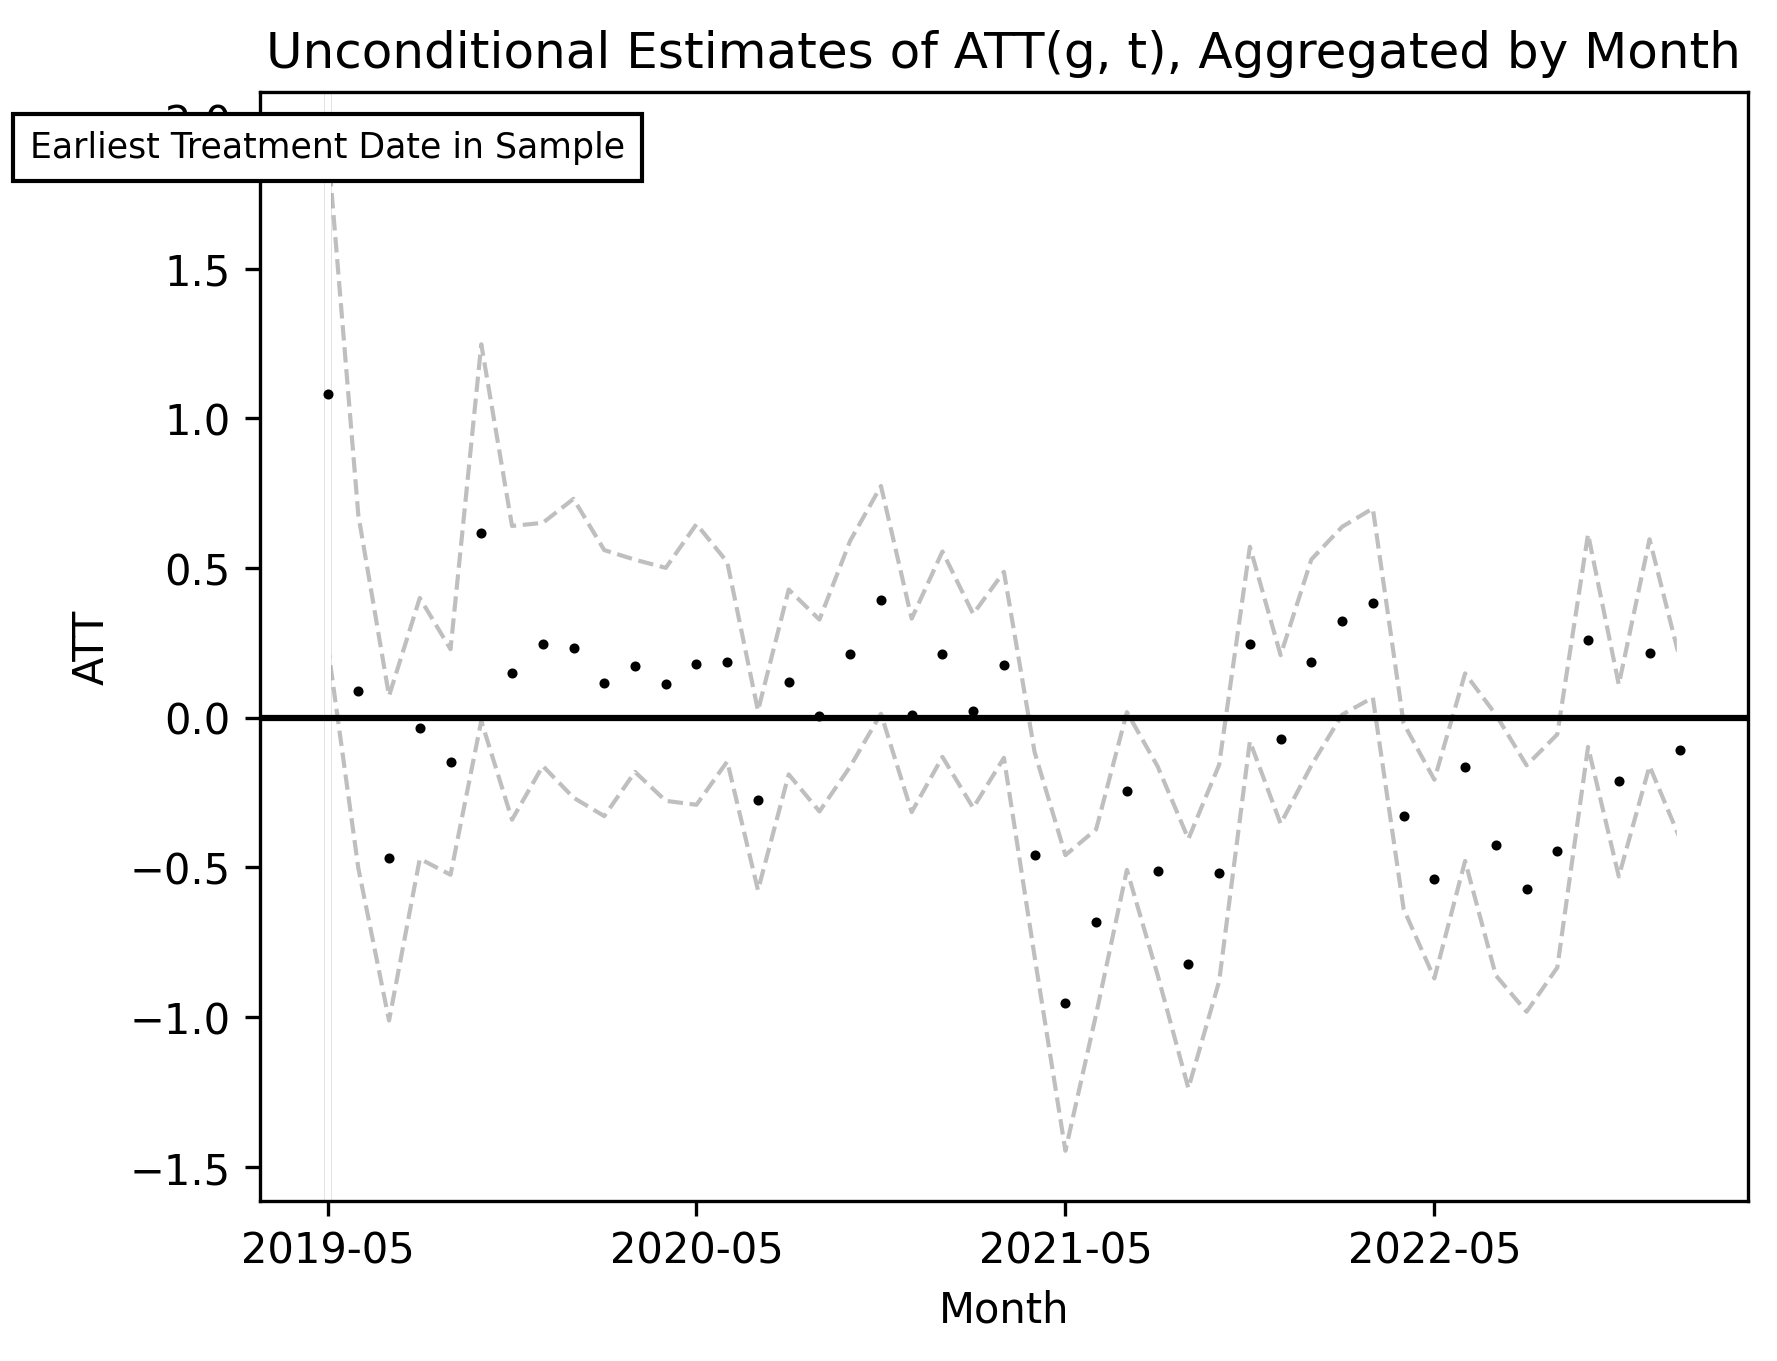

In [105]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [106]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   50%|█████████▉          | 1091/2184 [00:30<00:24, 44.69it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encou

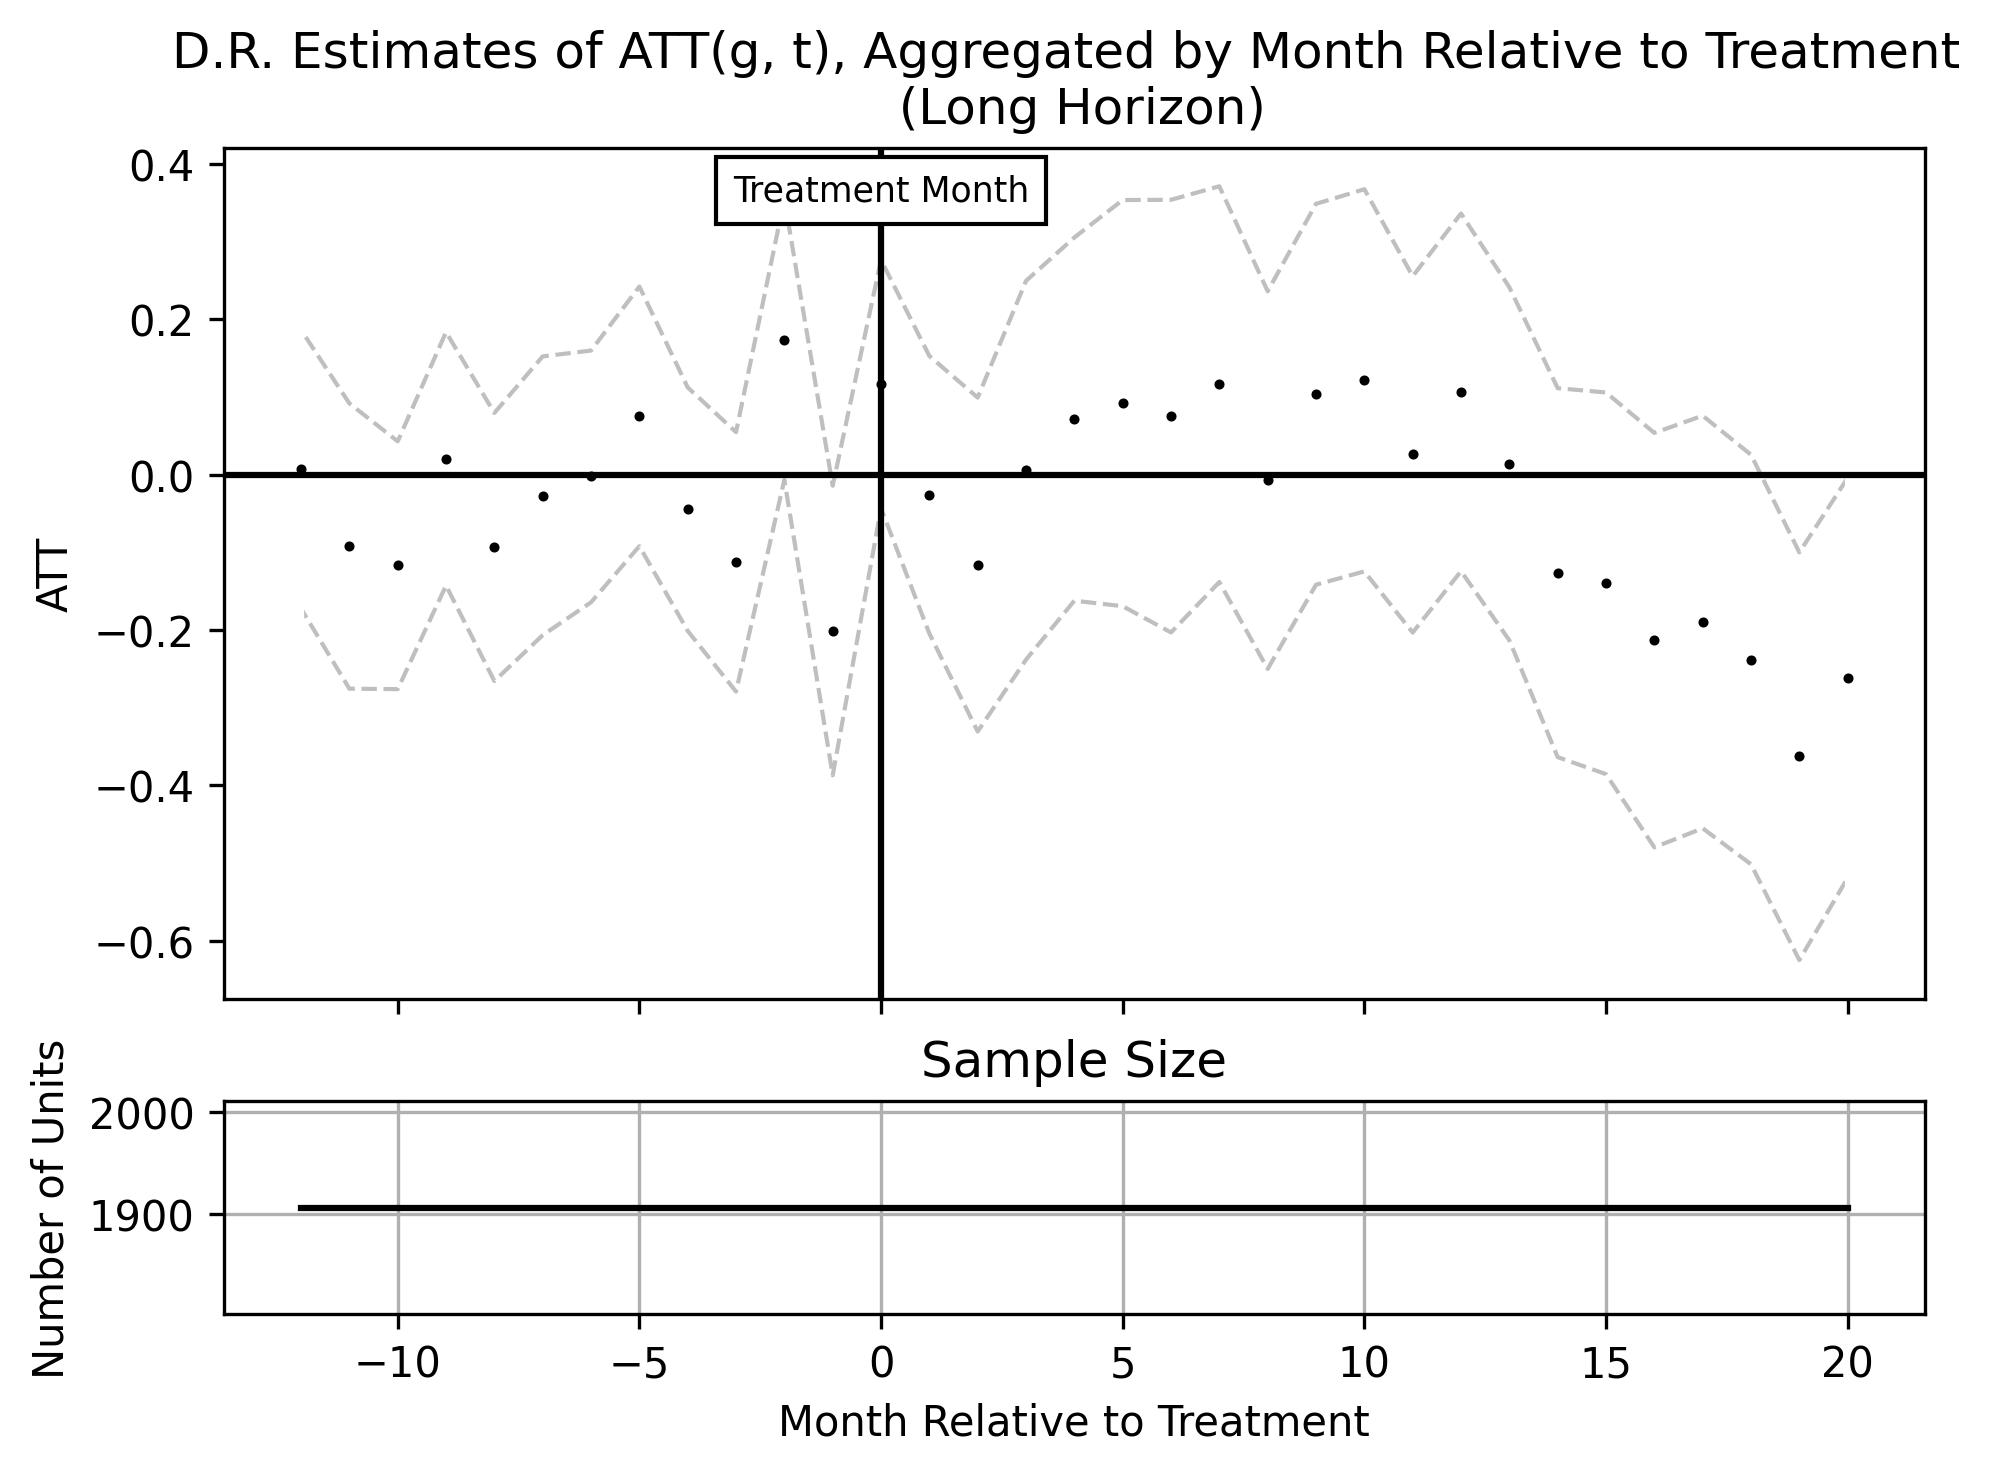

In [107]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

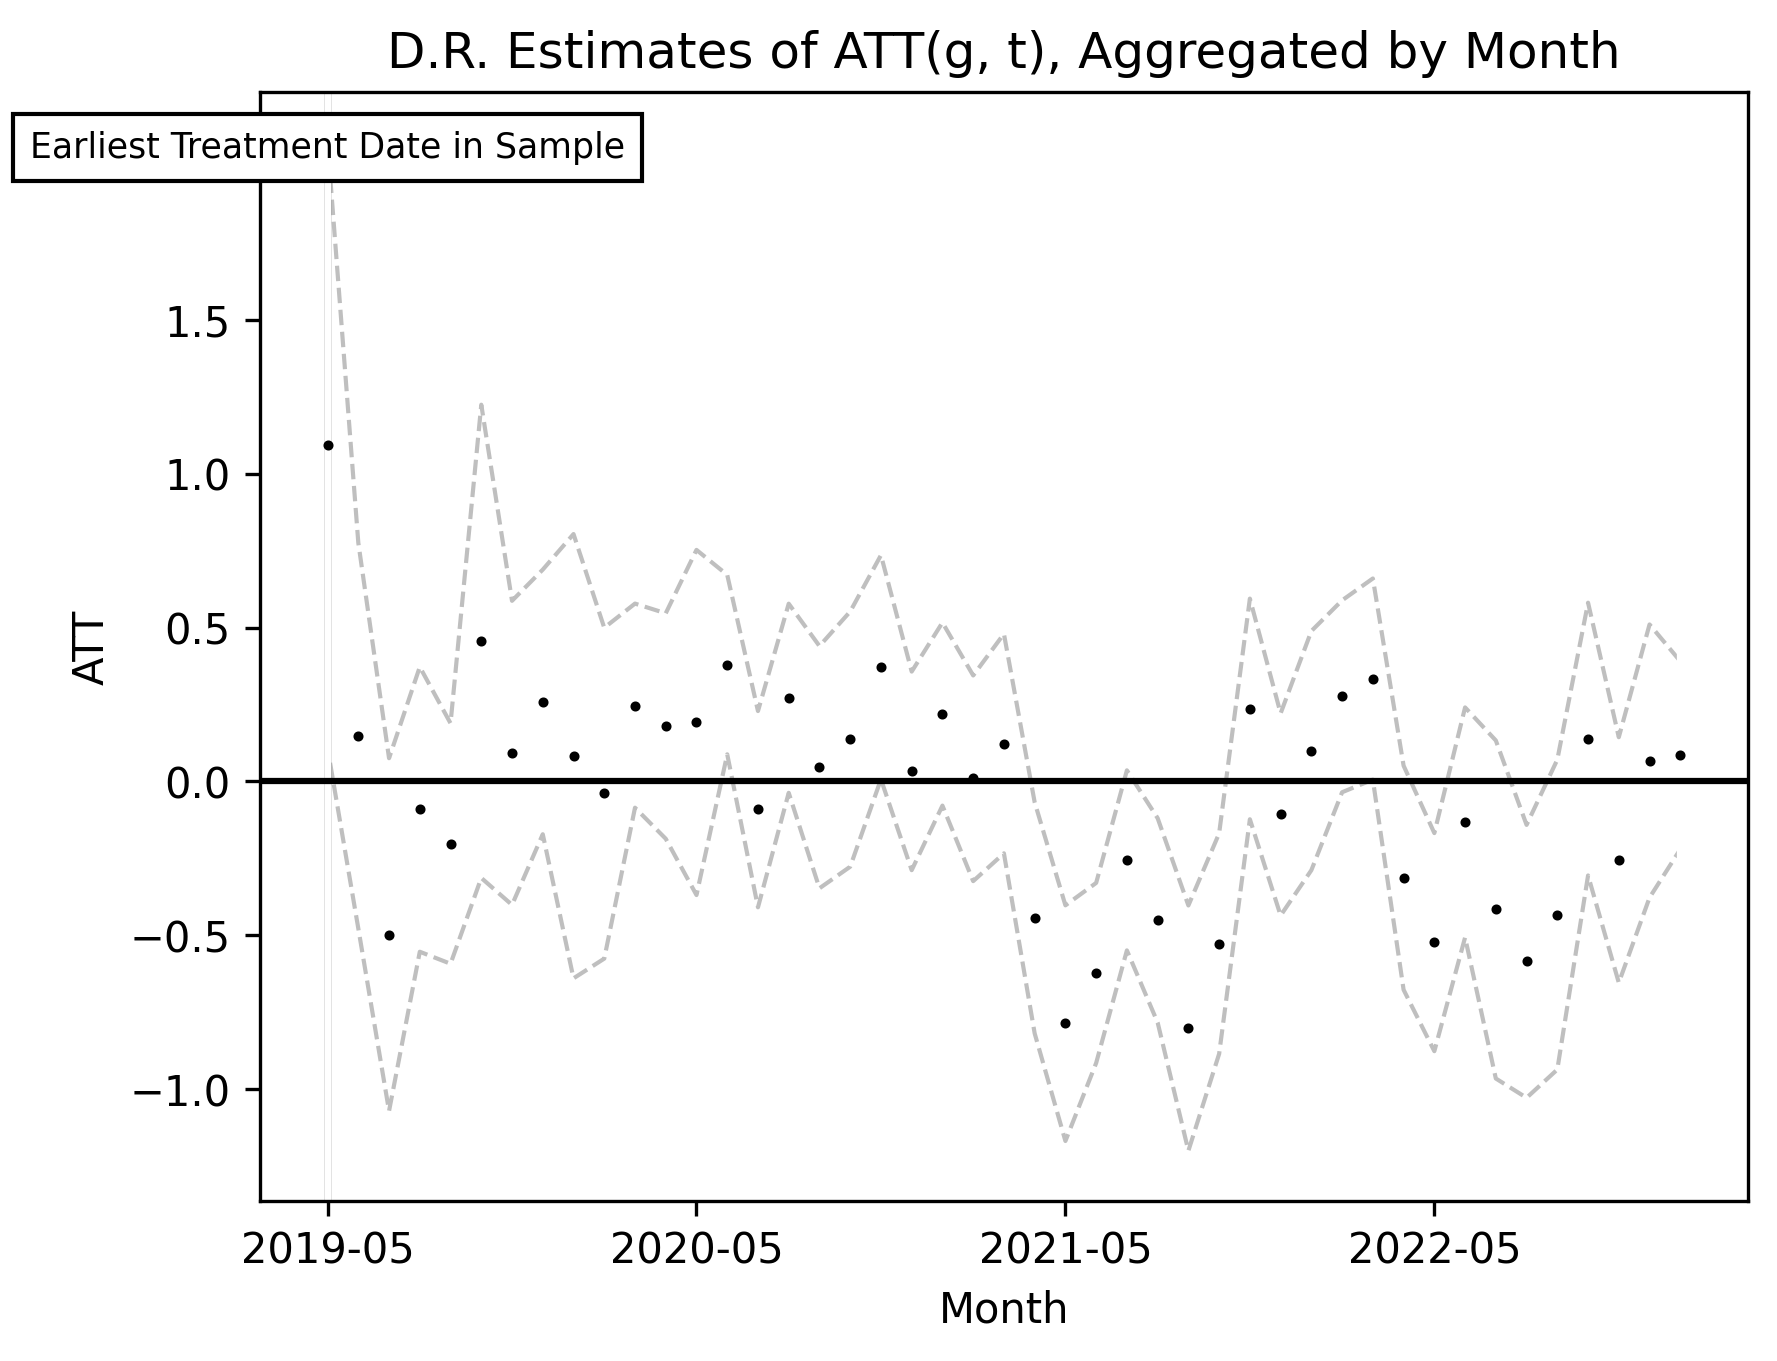

In [108]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")